In [44]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D,Conv2D,BatchNormalization
from keras import backend as K
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

preprocessing the data

In [45]:
img_rows, img_cols = 28, 28
batch_size = 256
epochs = 50
num_classes = 5
lr=0.001
data = pd.read_csv("ece-657a-w20-asg3-part-1/train.csv")


X = data.drop(columns=['Id','Label']).values
y = data[['Label']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2020)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2020)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
#normalize
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
X_val=X_val.reshape(X_val.shape[0],img_rows,img_cols,1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

input_shape = (img_rows, img_cols,1)

Firstly, we have 3 kinds of models, and see which one runs best.

In [3]:
#model 1

model0 = Sequential()
model0.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model0.add(Conv2D(64, (3, 3), activation='relu'))
model0.add(MaxPooling2D(pool_size=(2, 2)))
model0.add(Dropout(0.25))
model0.add(Flatten())
model0.add(Dense(128, activation='relu'))
model0.add(Dropout(0.25))
model0.add(Dense(num_classes, activation='softmax'))

model0.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=['accuracy'])

model0.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model0.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 28s 583us/step - loss: 0.6908 - accuracy: 0.7072 - val_loss: 0.4702 - val_accuracy: 0.8148
Epoch 2/50
48000/48000 [==============================] - 28s 584us/step - loss: 0.4648 - accuracy: 0.8104 - val_loss: 0.4055 - val_accuracy: 0.8338
Epoch 3/50
48000/48000 [==============================] - 27s 559us/step - loss: 0.4068 - accuracy: 0.8366 - val_loss: 0.3833 - val_accuracy: 0.8425
Epoch 4/50
48000/48000 [==============================] - 27s 572us/step - loss: 0.3744 - accuracy: 0.8486 - val_loss: 0.3595 - val_accuracy: 0.8557
Epoch 5/50
48000/48000 [==============================] - 27s 554us/step - loss: 0.3511 - accuracy: 0.8591 - val_loss: 0.3373 - val_accuracy: 0.8676
Epoch 6/50
48000/48000 [==============================] - 28s 574us/step - loss: 0.3218 - accuracy: 0.8722 - val_loss: 0.3153 - val_accuracy: 0.8733
Epoch 7/50
48000/48000 [==============================

try to change the value of batch size and epoch.

In [4]:
from keras.callbacks import ModelCheckpoint

In [5]:
#model 2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 12s 252us/step - loss: 0.9226 - accuracy: 0.5984 - val_loss: 0.7870 - val_accuracy: 0.6514
Epoch 2/50
48000/48000 [==============================] - 12s 245us/step - loss: 0.6168 - accuracy: 0.7433 - val_loss: 0.7397 - val_accuracy: 0.6702
Epoch 3/50
48000/48000 [==============================] - 11s 237us/step - loss: 0.5495 - accuracy: 0.7715 - val_loss: 0.5648 - val_accuracy: 0.7531
Epoch 4/50
48000/48000 [==============================] - 12s 243us/step - loss: 0.5063 - accuracy: 0.7917 - val_loss: 0.5727 - val_accuracy: 0.7506
Epoch 5/50
48000/48000 [==============================] - 12s 240us/step - loss: 0.4770 - accuracy: 0.8047 - val_loss: 0.5333 - val_accuracy: 0.7722
Epoch 6/50
48000/48000 [==============================] - 12s 245us/step - loss: 0.4536 - accuracy: 0.8152 - val_loss: 0.5396 - val_accuracy: 0.7642
Epoch 7/50
48000/48000 [==============================] 

In [8]:
#model 3 lenet 5
batch_size = 256
epochs = 100
num_classes = 5
lr=0.001
model2 = Sequential()

model2.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model2.add(AveragePooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model2.add(AveragePooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(units=120, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=84, activation='relu'))

model2.add(Dense(units=5, activation = 'softmax'))
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=['accuracy'])
history = model2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 9s 177us/step - loss: 0.9540 - accuracy: 0.5849 - val_loss: 0.6461 - val_accuracy: 0.7398
Epoch 2/100
48000/48000 [==============================] - 8s 165us/step - loss: 0.6432 - accuracy: 0.7328 - val_loss: 0.5285 - val_accuracy: 0.7933
Epoch 3/100
48000/48000 [==============================] - 8s 161us/step - loss: 0.5779 - accuracy: 0.7644 - val_loss: 0.4895 - val_accuracy: 0.8062
Epoch 4/100
48000/48000 [==============================] - 8s 164us/step - loss: 0.5406 - accuracy: 0.7815 - val_loss: 0.4587 - val_accuracy: 0.8190
Epoch 5/100
48000/48000 [==============================] - 8s 163us/step - loss: 0.5122 - accuracy: 0.7939 - val_loss: 0.4403 - val_accuracy: 0.8302
Epoch 6/100
48000/48000 [==============================] - 8s 171us/step - loss: 0.4930 - accuracy: 0.8011 - val_loss: 0.4256 - val_accuracy: 0.8365
Epoch 7/100
48000/48000 [==============================]

In [36]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)              

For the all the above 3 models, we found model 3 is accurate and fast. So we decided to decrease the learning rate and do more work on model 3.

In [9]:
#decrease the learning rate
batch_size = 128
epochs = 50
num_classes = 5
lr=0.0005
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=['accuracy'])
train_model1 = model2.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 10s 216us/step - loss: 0.2690 - accuracy: 0.8897 - val_loss: 0.2755 - val_accuracy: 0.8927
Epoch 2/50
48000/48000 [==============================] - 10s 200us/step - loss: 0.2674 - accuracy: 0.8925 - val_loss: 0.2826 - val_accuracy: 0.8869
Epoch 3/50
48000/48000 [==============================] - 10s 204us/step - loss: 0.2669 - accuracy: 0.8902 - val_loss: 0.2785 - val_accuracy: 0.8892
Epoch 4/50
48000/48000 [==============================] - 10s 206us/step - loss: 0.2674 - accuracy: 0.8898 - val_loss: 0.2737 - val_accuracy: 0.8941
Epoch 5/50
48000/48000 [==============================] - 10s 203us/step - loss: 0.2642 - accuracy: 0.8911 - val_loss: 0.2830 - val_accuracy: 0.8870
Epoch 6/50
48000/48000 [==============================] - 10s 205us/step - loss: 0.2647 - accuracy: 0.8936 - val_loss: 0.2716 - val_accuracy: 0.8919
Epoch 7/50
48000/48000 [==============================] 

In [10]:
batch_size = 128
epochs = 50
num_classes = 5
lr=0.00025
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=['accuracy'])
train_model2 = model2.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 10s 210us/step - loss: 0.2427 - accuracy: 0.9000 - val_loss: 0.2645 - val_accuracy: 0.8970
Epoch 2/50
48000/48000 [==============================] - 10s 208us/step - loss: 0.2381 - accuracy: 0.9033 - val_loss: 0.2613 - val_accuracy: 0.8995
Epoch 3/50
48000/48000 [==============================] - 10s 202us/step - loss: 0.2409 - accuracy: 0.9021 - val_loss: 0.2631 - val_accuracy: 0.8989
Epoch 4/50
48000/48000 [==============================] - 10s 205us/step - loss: 0.2384 - accuracy: 0.9015 - val_loss: 0.2634 - val_accuracy: 0.8999
Epoch 5/50
48000/48000 [==============================] - 10s 204us/step - loss: 0.2377 - accuracy: 0.9021 - val_loss: 0.2599 - val_accuracy: 0.8999
Epoch 6/50
48000/48000 [==============================] - 10s 205us/step - loss: 0.2395 - accuracy: 0.9010 - val_loss: 0.2636 - val_accuracy: 0.8992
Epoch 7/50
48000/48000 [==============================] 

In [13]:
from keras.callbacks import ModelCheckpoint
batch_size = 64
epochs = 50
num_classes = 5
lr=0.000125
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=['accuracy'])
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
train_model3 = model2.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 13s 275us/step - loss: 0.2247 - accuracy: 0.9084 - val_loss: 0.2668 - val_accuracy: 0.8989
Epoch 2/50
48000/48000 [==============================] - 13s 262us/step - loss: 0.2250 - accuracy: 0.9093 - val_loss: 0.2594 - val_accuracy: 0.9018
Epoch 3/50
48000/48000 [==============================] - 13s 268us/step - loss: 0.2279 - accuracy: 0.9054 - val_loss: 0.2603 - val_accuracy: 0.9007
Epoch 4/50
48000/48000 [==============================] - 13s 261us/step - loss: 0.2278 - accuracy: 0.9087 - val_loss: 0.2655 - val_accuracy: 0.8977
Epoch 5/50
48000/48000 [==============================] - 12s 259us/step - loss: 0.2274 - accuracy: 0.9079 - val_loss: 0.2589 - val_accuracy: 0.9021
Epoch 6/50
48000/48000 [==============================] - 13s 262us/step - loss: 0.2252 - accuracy: 0.9090 - val_loss: 0.2607 - val_accuracy: 0.9003
Epoch 7/50
48000/48000 [==============================] 

In [18]:
print(checkpoint)

In [20]:
batch_size = 64
epochs = 50
num_classes = 5
lr=0.00007
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(learning_rate=lr),
              metrics=['accuracy'])
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
train_model4 = model2.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(X_val, y_val),
                         callbacks=callbacks_list)
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 14s 282us/step - loss: 0.2192 - accuracy: 0.9110 - val_loss: 0.2638 - val_accuracy: 0.9007

Epoch 00001: val_accuracy improved from -inf to 0.90067, saving model to weights.best.hdf5
Epoch 2/50
48000/48000 [==============================] - 13s 270us/step - loss: 0.2169 - accuracy: 0.9116 - val_loss: 0.2586 - val_accuracy: 0.9017

Epoch 00002: val_accuracy improved from 0.90067 to 0.90167, saving model to weights.best.hdf5
Epoch 3/50
48000/48000 [==============================] - 13s 271us/step - loss: 0.2191 - accuracy: 0.9108 - val_loss: 0.2586 - val_accuracy: 0.9007

Epoch 00003: val_accuracy did not improve from 0.90167
Epoch 4/50
48000/48000 [==============================] - 13s 279us/step - loss: 0.2184 - accuracy: 0.9098 - val_loss: 0.2592 - val_accuracy: 0.9020

Epoch 00004: val_accuracy improved from 0.90167 to 0.90200, saving model to weights.best.hdf5
Epoch 5/50
48000

In [26]:
batch_size = 32
epochs = 50
num_classes = 5
lr=0.00003
model2.load_weights("weights.best.hdf5")
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(learning_rate=lr),
              metrics=['accuracy'])
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
train_model4 = model2.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(X_val, y_val),
                         callbacks=callbacks_list)
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 19s 386us/step - loss: 0.2125 - accuracy: 0.9140 - val_loss: 0.2593 - val_accuracy: 0.9034

Epoch 00001: val_accuracy improved from -inf to 0.90342, saving model to weights.best.hdf5
Epoch 2/50
48000/48000 [==============================] - 18s 376us/step - loss: 0.2107 - accuracy: 0.9137 - val_loss: 0.2586 - val_accuracy: 0.9037

Epoch 00002: val_accuracy improved from 0.90342 to 0.90367, saving model to weights.best.hdf5
Epoch 3/50
48000/48000 [==============================] - 18s 377us/step - loss: 0.2117 - accuracy: 0.9135 - val_loss: 0.2615 - val_accuracy: 0.9011

Epoch 00003: val_accuracy did not improve from 0.90367
Epoch 4/50
48000/48000 [==============================] - 18s 370us/step - loss: 0.2107 - accuracy: 0.9154 - val_loss: 0.2594 - val_accuracy: 0.9039

Epoch 00004: val_accuracy improved from 0.90367 to 0.90392, saving model to weights.best.hdf5
Epoch 5/50
48000

In [73]:
from itertools import chain 
_, _, _, y_test = train_test_split(X, y, test_size=0.1, random_state=2020)
y_test = list(chain.from_iterable(y_test)) 
predicted_classes = model2.predict_classes(X_test)
correct = np.nonzero(predicted_classes==y_test)[0]
incorrect = np.nonzero(predicted_classes!=y_test)[0]

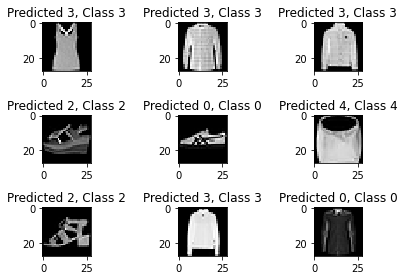

In [74]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()
plt.show()

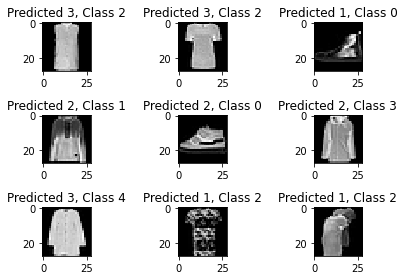

In [75]:
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()
plt.show()

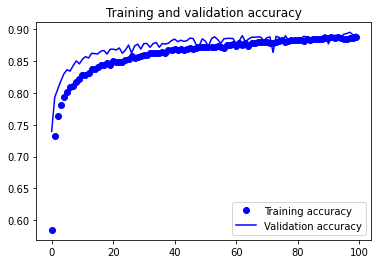

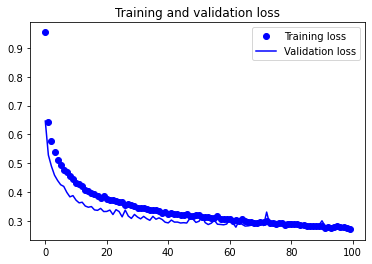

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
#Evaluate your code with other metrics on the training data
X_train, X_test_new, y_train, y_test_new = train_test_split(X_train, y_train, test_size=0.2, random_state=2020)
score = model2.evaluate(X_test_new, y_test_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.140669985441491
Test accuracy: 0.9436197876930237


In [27]:
# model2.load_weights("weights.best.hdf5")
# test = pd.read_csv("ece-657a-w20-asg3-part-1/testX.csv")
# testData = test.drop(columns= ['Id']).values
# testData = testData.astype('float32')
# testData = testData/255
# testData=testData.reshape(testData.shape[0],img_rows,img_cols,1)
# y_prob = model2.predict(testData) 
# y_classes = y_prob.argmax(axis=-1)
# result = pd.DataFrame() 
# result['Id']=[i for i in range(10000)]
# result['Label']=(y_classes)
# result.to_csv(r'r6.csv', index = False)
#final test accuracy: 90.44%